In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
dados = pd.read_csv('/content/drive/MyDrive/FireWatch 2024 Brasil/Dataset_FireWatch_Brazil_Q2_2024.csv')

In [117]:
dados.head()

,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-04-01,NOVO ARIPUANÃ,AMAZONAS,Amazônia,0.00,5007.00,0.0,6.0
1,2024-04-01,BARREIRINHA,AMAZONAS,Amazônia,0.00,2849.00,0.0,57.0
2,2024-04-01,MANAUS,AMAZONAS,Amazônia,1.00,1506.00,0.0,16.0
3,2024-04-01,PARINTINS,AMAZONAS,Amazônia,0.00,1056.00,0.0,33.0
4,2024-04-01,ITACOATIARA,AMAZONAS,Amazônia,1.25,1322.25,0.0,53.0


In [118]:
dados = dados.rename(columns={'avg_frp': 'avg_risco_de_fogo'})
dados.head()


,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_risco_de_fogo
0,2024-04-01,NOVO ARIPUANÃ,AMAZONAS,Amazônia,0.00,5007.00,0.0,6.0
1,2024-04-01,BARREIRINHA,AMAZONAS,Amazônia,0.00,2849.00,0.0,57.0
2,2024-04-01,MANAUS,AMAZONAS,Amazônia,1.00,1506.00,0.0,16.0
3,2024-04-01,PARINTINS,AMAZONAS,Amazônia,0.00,1056.00,0.0,33.0
4,2024-04-01,ITACOATIARA,AMAZONAS,Amazônia,1.25,1322.25,0.0,53.0


In [119]:
dados = dados.drop('avg_risco_fogo', axis=1)


In [51]:
# Verificar valores ausentes
print(dados.isnull().sum())


data                         0
municipio                    0
estado                       0
bioma                        0
avg_numero_dias_sem_chuva    0
avg_precipitacao             0
avg_risco_de_fogo            0
dtype: int64


In [52]:
# Remover duplicatas
dados.drop_duplicates(inplace=True)


In [53]:
dados.dropna(inplace=True)  # Para remover linhas com valores ausentes

In [87]:
# Agrupando os dados por estado e calculando o risco médio
dados_por_estado = dados.groupby('estado')['avg_risco_de_fogo'].mean().reset_index()

In [88]:
# Ordenando os estados pelo risco médio de forma decrescente
estados_ordenados = dados_por_estado.sort_values('avg_risco_de_fogo', ascending=False)

In [89]:
# Selecionando os 5 primeiros estados
top_5_estados = estados_ordenados.head(5)
print(top_5_estados)

         estado  avg_risco_de_fogo
10  MATO GROSSO         165.245041
22      RORAIMA         158.345028
26    TOCANTINS         149.557603
9      MARANHÃO         135.892345
17        PIAUÍ         123.456114


<ipython-input-95-21c7b34352d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estado', y='avg_risco_de_fogo', data=top_5_estados, palette='plasma')


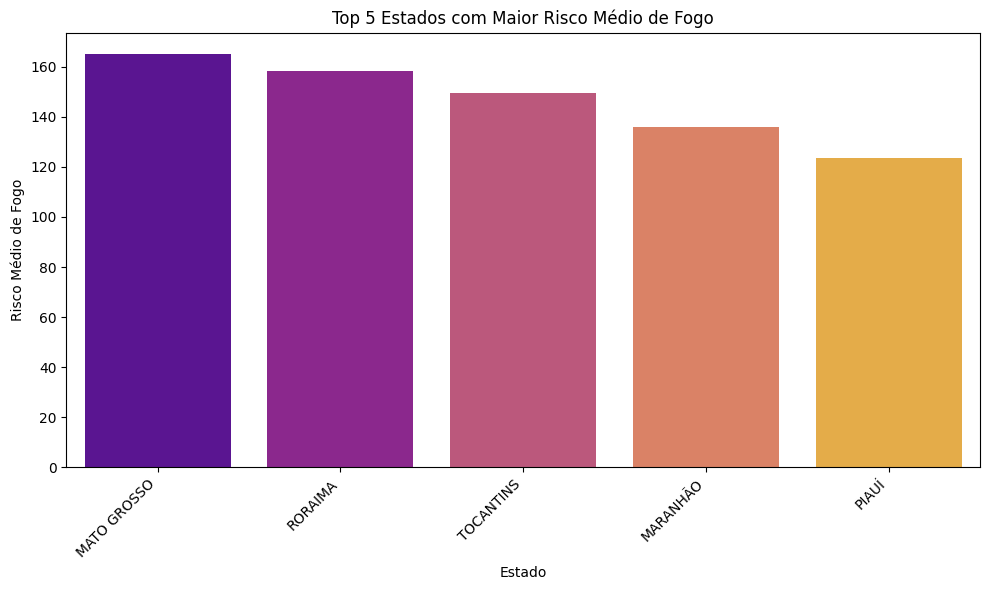

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x='estado', y='avg_risco_de_fogo', data=top_5_estados, palette='plasma')
plt.xlabel('Estado')
plt.ylabel('Risco Médio de Fogo')
plt.title('Top 5 Estados com Maior Risco Médio de Fogo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-100-a5af5a422e20>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estado', y='avg_numero_dias_sem_chuva', data=top_5_estados_dias_sem_chuva, palette='viridis')


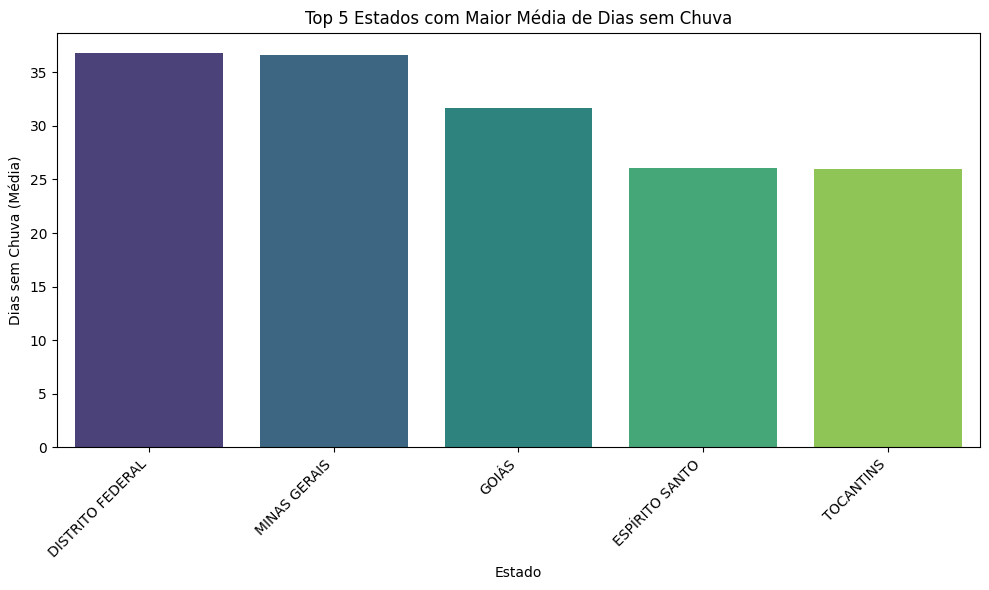

In [100]:
# Agrupando os dados por estado e calculando a média de dias sem chuva
dados_por_estado_dias_sem_chuva = dados.groupby('estado')['avg_numero_dias_sem_chuva'].mean().reset_index()

# Ordenando os estados pelo número médio de dias sem chuva de forma decrescente
estados_ordenados_dias_sem_chuva = dados_por_estado_dias_sem_chuva.sort_values('avg_numero_dias_sem_chuva', ascending=False)

# Selecionando os 5 primeiros estados
top_5_estados_dias_sem_chuva = estados_ordenados_dias_sem_chuva.head(5)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='estado', y='avg_numero_dias_sem_chuva', data=top_5_estados_dias_sem_chuva, palette='viridis')
plt.xlabel('Estado')
plt.ylabel('Dias sem Chuva (Média)')
plt.title('Top 5 Estados com Maior Média de Dias sem Chuva')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-126-101d148edaa4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estado', y='avg_precipitacao', data=top_5_estados_precipitacao, palette='viridis')


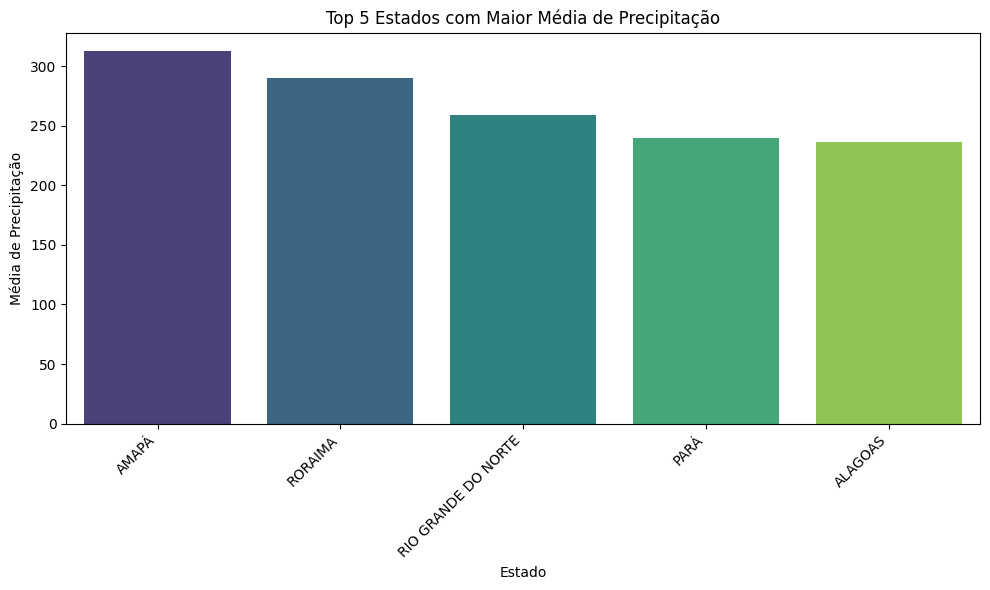

In [126]:
# Agrupando os dados por estado e calculando a média de precipitação
dados_por_estado_precipitacao = dados.groupby('estado')['avg_precipitacao'].mean().reset_index()

# Ordenando os estados pela média de precipitação de forma decrescente
estados_ordenados_precipitacao = dados_por_estado_precipitacao.sort_values('avg_precipitacao', ascending=False)

# Selecionando os 5 primeiros estados
top_5_estados_precipitacao = estados_ordenados_precipitacao.head(5)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='estado', y='avg_precipitacao', data=top_5_estados_precipitacao, palette='viridis')
plt.xlabel('Estado')
plt.ylabel('Média de Precipitação')
plt.title('Top 5 Estados com Maior Média de Precipitação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [57]:
# Convertendo a coluna de data para o tipo datetime
dados['data'] = pd.to_datetime(dados['data'])


In [58]:
# Extraindo mês e ano da coluna de data
dados['mes'] = dados['data'].dt.month
dados['ano'] = dados['data'].dt.year


In [59]:
# Agregando os dados por ano e mês
mensal_risco = dados.groupby(['ano', 'mes'])['avg_risco_de_fogo'].mean().reset_index()

# Criando uma coluna de data com dia fixo (1)
mensal_risco['data'] = pd.to_datetime(mensal_risco['ano'].astype(str) + '-' + mensal_risco['mes'].astype(str) + '-01')


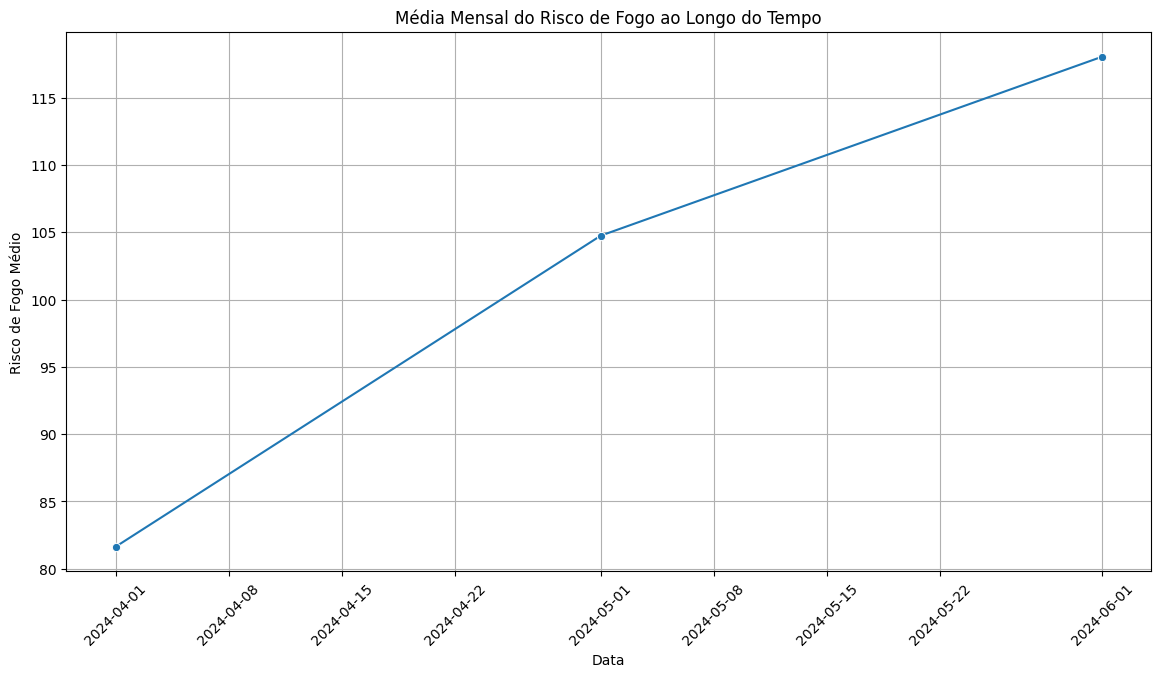

In [60]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=mensal_risco, x='data', y='avg_risco_de_fogo', marker='o')
plt.title('Média Mensal do Risco de Fogo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Risco de Fogo Médio')
plt.xticks(rotation=45)
plt.grid()
plt.show()

A linha mostra uma tendência geral de aumento no risco de fogo ao longo do período analisado. Isso pode indicar que as condições estão se tornando mais favoráveis para incêndios.

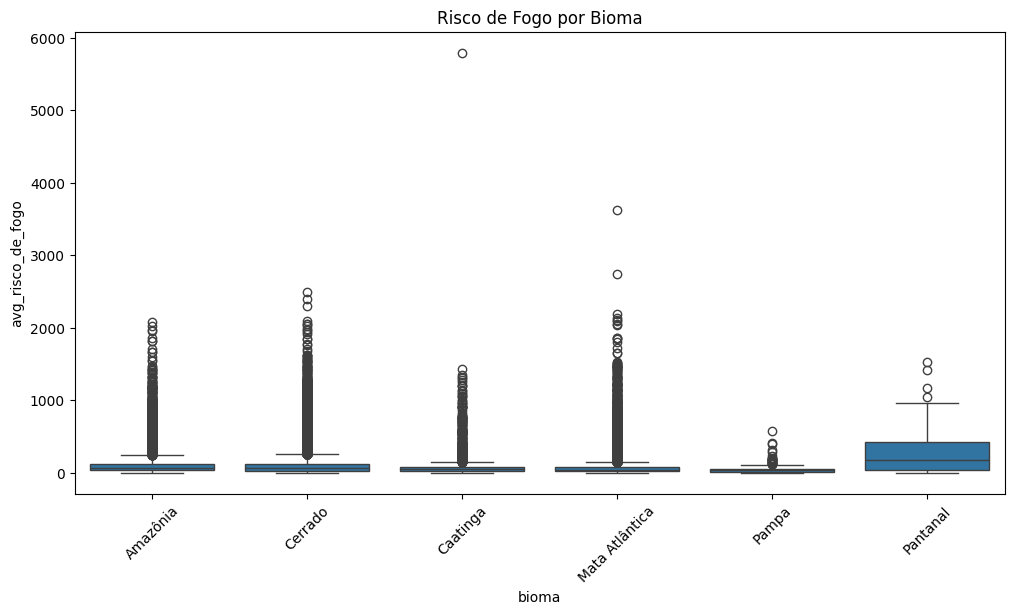

In [56]:
# Boxplot do risco de fogo por bioma
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados, x='bioma', y='avg_risco_de_fogo')
plt.title('Risco de Fogo por Bioma')
plt.xticks(rotation=45)
plt.show()


 O Cerrado e a Caatinga apresentam medias semelhantes, enquanto a Amazônia e a Mata Atlântica têm uma variação considerável. O Pantanal parece ter um risco de fogo médio mais elevado em comparação com os outros biomas, conforme indicado pela altura da caixa e a presença de outliers. Existem outliers significativos em quase todos os biomas, indicando que há ocorrências de risco de fogo que estão muito acima da média.

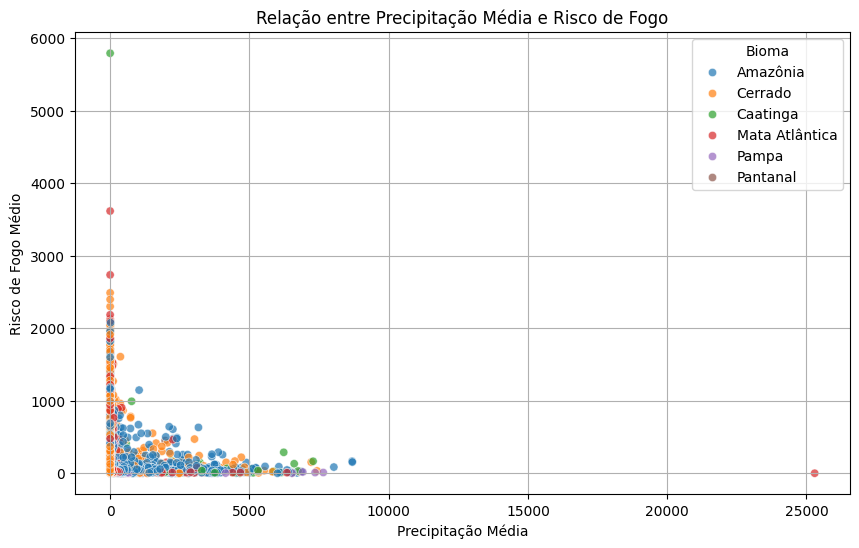

In [61]:
# Gráfico de dispersão entre avg_precipitacao e avg_risco_de_fogo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='avg_precipitacao', y='avg_risco_de_fogo', hue='bioma', alpha=0.7)
plt.title('Relação entre Precipitação Média e Risco de Fogo')
plt.xlabel('Precipitação Média')
plt.ylabel('Risco de Fogo Médio')
plt.grid()
plt.legend(title='Bioma')
plt.show()

1. Há uma tendência observada de que, à medida que a Precipitação Média aumenta, o Risco de Fogo Médio tende a diminuir. Isso é esperado, já que a umidade geralmente reduz a probabilidade de incêndios.
2. Existem alguns outliers notáveis, onde um risco de fogo muito alto é observado com níveis variados de precipitação. Esses pontos merecem uma investigação mais aprofundada, pois podem indicar situações específicas (como secas prolongadas ou condições ambientais adversas) que aumentam o risco de incêndios, mesmo com alguma precipitação.
3. O gráfico mostra diferentes cores representando biomas. Algumas áreas parecem ter mais pontos de alto risco em relação à precipitação, sugerindo que esses biomas podem ser mais vulneráveis ao fogo sob certas condições climáticas.